In [3]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


# Loading csv data
bids = pd.read_csv('./datas/bids.csv')
train = pd.read_csv('./datas/train.csv')

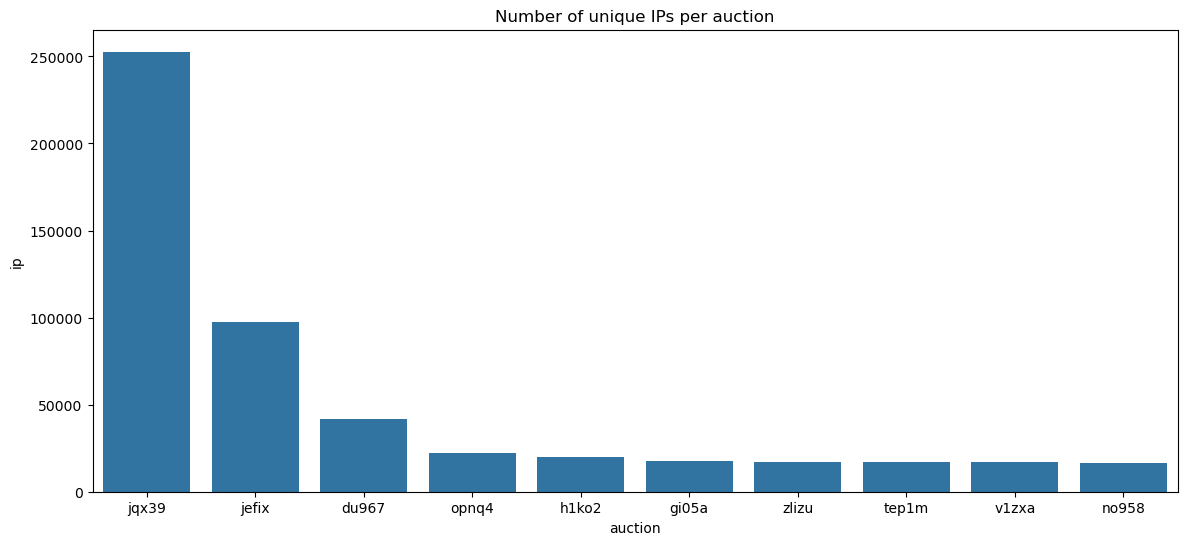

In [26]:
# 1. Get the number of unique IPs per auction
auctionIpCounts = bids.groupby('auction')['ip'].nunique().reset_index()

# Draw the result
auctionIpCounts = auctionIpCounts.sort_values('ip', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x='auction', y='ip', data=auctionIpCounts.head(10))
plt.title('Number of unique IPs per auction')
plt.show()

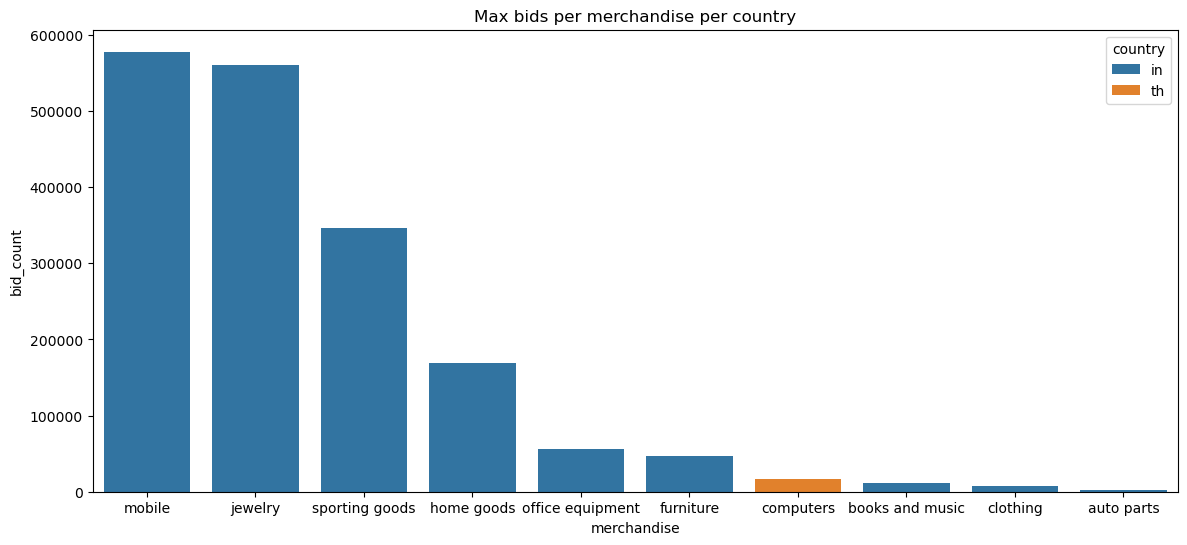

In [27]:
# 2. Count max bids per merchandise per country
groupedMerchadiseByCountry = bids.groupby(['merchandise', 'country']).size().reset_index(name='bid_count')
max_bids_per_merchandise = groupedMerchadiseByCountry.loc[groupedMerchadiseByCountry.groupby('merchandise')['bid_count'].idxmax()]
max_bids_per_merchandise = max_bids_per_merchandise.sort_values('bid_count', ascending=False)
# Draw result
plt.figure(figsize=(14, 6))
sns.barplot(x='merchandise', y='bid_count', hue='country', data=max_bids_per_merchandise.head(10))
plt.title('Max bids per merchandise per country')
plt.show()

/tmp/ipykernel_17062/1236244236.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = bids.groupby(['period', 'auction'])['bidder_id'].nunique().reset_index(name='unique_bidders')
/tmp/ipykernel_17062/1236244236.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_unique_bidders = grouped.groupby('period')['unique_bidders'].mean().reset_index(name='average_unique_bidders')


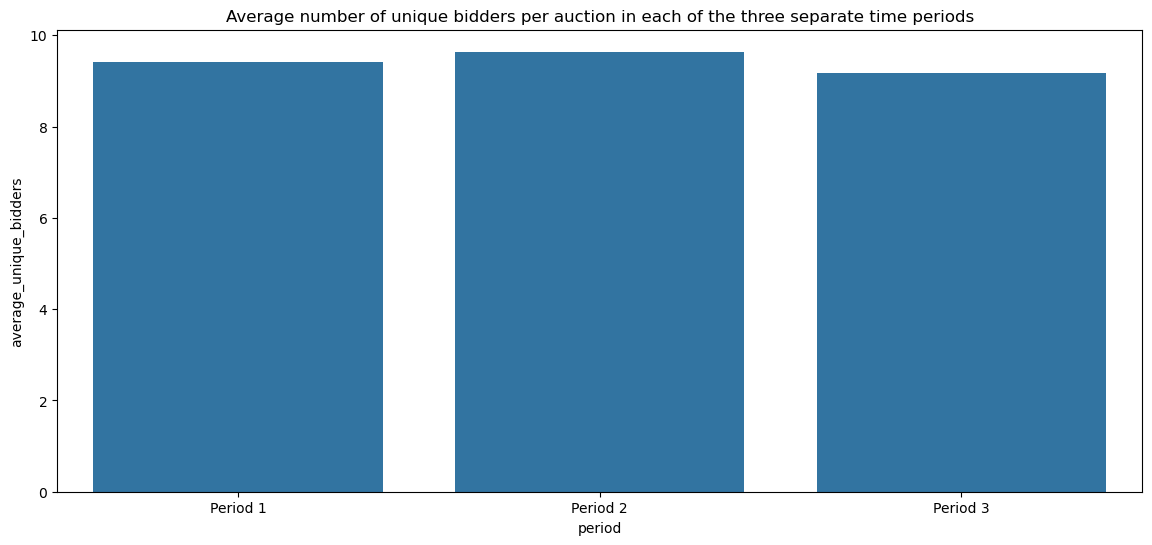

In [29]:
# 3. Calculate average number of unique bidders per auction in each of the three separate time periods
# Convert the time column to datetime
bids['time'] = pd.to_datetime(bids['time'])
start_time = bids['time'].min()
end_time = bids['time'].max()
periods = pd.date_range(start=start_time, end=end_time, periods=4)
# Attribute a period to each record
bids['period'] = pd.cut(bids['time'], bins=periods, labels=['Period 1', 'Period 2', 'Period 3'])
# Group by period and auction, then find unique bidders for each auction
grouped = bids.groupby(['period', 'auction'])['bidder_id'].nunique().reset_index(name='unique_bidders')
# Calculate the average number of unique bidders per auction for each period
average_unique_bidders = grouped.groupby('period')['unique_bidders'].mean().reset_index(name='average_unique_bidders')

#Draw the result
average_unique_bidders = average_unique_bidders.sort_values('average_unique_bidders', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x='period', y='average_unique_bidders', data=average_unique_bidders)
plt.title('Average number of unique bidders per auction in each of the three separate time periods')
plt.show()